#Reconocimiento de Patrones 
## Practica 5
### Acosta Imandt Daniel

Cargamos librerías, los datos y los dividimos en un conjunto de prueba y de entrenamiento.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn 
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
data=pd.read_csv('iris(1).csv')
data.head()
y=data.iloc[:,4]
X=data.iloc[:,0:4]
X.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
train , test=sklearn.model_selection.train_test_split(data,test_size=0.3,train_size=0.7,random_state=5)
train['Species'].unique()


array(['virginica', 'versicolor', 'setosa'], dtype=object)

In [4]:
train_setosa=train[train['Species']=='setosa']
train_versicolor=train[train['Species']=='versicolor']
train_virginica=train[train['Species']=='virginica']

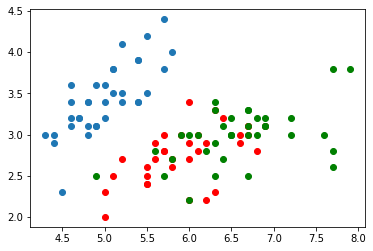

In [5]:
plt.scatter(train_setosa['Sepal.Length'],train_setosa['Sepal.Width'])
plt.scatter(train_versicolor['Sepal.Length'],train_versicolor['Sepal.Width'],color='red')
plt.scatter(train_virginica['Sepal.Length'],train_virginica['Sepal.Width'],color='green')

Sacamos la media de cada tipo de planta, su matriz de covarianza, a partir de esto creamos una función vista por Bayes para patroens normales, para sacar su función de decisión.A partir de la función de decisión de los tres tipos de plantas creamos otra función que saca el mayor de estos, preferentemente positivo y  te dirá a que grupo pertenece un nuevo valor dado.

In [6]:
mu1=train_setosa.mean()
mu2=train_versicolor.mean()
mu3=train_virginica.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  This is separate from the ipykernel package so we can avoid doing imports until


In [7]:
cov1=train_setosa.cov().to_numpy()
cov2=train_versicolor.cov().to_numpy()
cov3=train_virginica.cov().to_numpy()


In [8]:
p1=45/135

p2=46/135

p3=44/135

In [9]:
def dec(x,cov,mu,pc):
    return -1/2*np.log(np.linalg.det(cov))-1/2*np.transpose(x-mu).to_numpy()@np.linalg.inv(cov)@(x-mu).to_numpy()+np.log(pc)

In [10]:
def clasifica(x):
    v1=dec(x,cov1,mu1,p1)
    v2=dec(x,cov2,mu2,p2)
    v3=dec(x,cov3,mu3,p3)
    c=[v1,v2,v3]
    #print(c)
    d=max(c)
    indic=c.index(d)
    return(indic)



Probamos nuestro código

In [11]:
test=test.reset_index()


In [12]:
ytest=test.iloc[:,5]
ytest

0     versicolor
1      virginica
2      virginica
3         setosa
4      virginica
5     versicolor
6         setosa
7     versicolor
8         setosa
9     versicolor
10    versicolor
11     virginica
12     virginica
13     virginica
14        setosa
15        setosa
16     virginica
17     virginica
18        setosa
19        setosa
20    versicolor
21     virginica
22        setosa
23    versicolor
24    versicolor
25     virginica
26    versicolor
27    versicolor
28    versicolor
29     virginica
30        setosa
31    versicolor
32    versicolor
33        setosa
34    versicolor
35        setosa
36        setosa
37     virginica
38        setosa
39     virginica
40     virginica
41    versicolor
42        setosa
43        setosa
44    versicolor
Name: Species, dtype: object

In [13]:

for i in range(len(ytest)):
    if(ytest[i]=='setosa'):
        ytest[i]=0
    elif(ytest[i]=='versicolor'):
        ytest[i]=1
    else:
        ytest[i]=2
ytest

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


0     1
1     2
2     2
3     0
4     2
5     1
6     0
7     1
8     0
9     1
10    1
11    2
12    2
13    2
14    0
15    0
16    2
17    2
18    0
19    0
20    1
21    2
22    0
23    1
24    1
25    2
26    1
27    1
28    1
29    2
30    0
31    1
32    1
33    0
34    1
35    0
36    0
37    2
38    0
39    2
40    2
41    1
42    0
43    0
44    1
Name: Species, dtype: object

In [14]:
xtest=test.iloc[:,1:5]
xtest


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,5.8,2.7,3.9,1.2
1,6.1,2.6,5.6,1.4
2,5.8,2.8,5.1,2.4
3,4.4,3.2,1.3,0.2
4,7.2,3.6,6.1,2.5
5,4.9,2.4,3.3,1.0
6,4.9,3.0,1.4,0.2
7,5.9,3.2,4.8,1.8
8,5.0,3.0,1.6,0.2
9,5.4,3.0,4.5,1.5


In [15]:
clases=[]
for i in range(len(xtest)):
    x=xtest.iloc[i,0:5].to_numpy()
    clases.append(clasifica(x))

In [16]:
clases=np.array(clases)
clases

array([1, 2, 2, 0, 2, 1, 0, 2, 0, 1, 1, 1, 2, 2, 0, 0, 2, 2, 0, 0, 1, 2,
       0, 1, 1, 2, 1, 1, 1, 2, 0, 1, 1, 0, 1, 0, 0, 2, 0, 2, 2, 1, 0, 0,
       1])

In [17]:
ytest
ytest=ytest.astype('int')
ytest

0     1
1     2
2     2
3     0
4     2
5     1
6     0
7     1
8     0
9     1
10    1
11    2
12    2
13    2
14    0
15    0
16    2
17    2
18    0
19    0
20    1
21    2
22    0
23    1
24    1
25    2
26    1
27    1
28    1
29    2
30    0
31    1
32    1
33    0
34    1
35    0
36    0
37    2
38    0
39    2
40    2
41    1
42    0
43    0
44    1
Name: Species, dtype: int64

In [18]:
train_virginica

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
126,6.2,2.8,4.8,1.8,virginica
124,6.7,3.3,5.7,2.1,virginica
117,7.7,3.8,6.7,2.2,virginica
146,6.3,2.5,5.0,1.9,virginica
149,5.9,3.0,5.1,1.8,virginica
147,6.5,3.0,5.2,2.0,virginica
104,6.5,3.0,5.8,2.2,virginica
145,6.7,3.0,5.2,2.3,virginica
136,6.3,3.4,5.6,2.4,virginica
127,6.1,3.0,4.9,1.8,virginica


Vemos las métricas de precisión para nuestro modelo

In [19]:
from sklearn.metrics import accuracy_score
print('exactitud:',accuracy_score(clases,ytest))

exactitud: 0.9555555555555556


In [20]:
from sklearn.metrics import precision_score
print('exactitud:',precision_score(clases,ytest,average='micro'))

exactitud: 0.9555555555555556


In [21]:
from sklearn.metrics import recall_score
print('exactitud:',recall_score(clases,ytest,average='micro'))

exactitud: 0.9555555555555556


In [22]:
from sklearn.metrics import f1_score
print('exactitud:',f1_score(clases,ytest,average='micro'))

exactitud: 0.9555555555555556


In [23]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(clases, ytest, labels=[0, 1,2])

print(cm)

[[15  0  0]
 [ 0 15  1]
 [ 0  1 13]]


In [24]:
tp= cm[0][0]+cm[1][1]+cm[2][2]
tn=cm[0][1]+cm[0][2]+cm[1][0]+cm[1][2]+cm[2][0]+cm[2][1]
fp=cm[0][1]+cm[0][2]+cm[1][2]
fn=cm[2][0]+cm[2][1]+cm[1][0]
print('True Positive', tp)
print('True Negative', tn)
print('False Positive', fp)
print('False Negative', fn)

True Positive 43
True Negative 2
False Positive 1
False Negative 1


Comparamos con el algoritmo de Kvecinos.

In [25]:
#Importando las librerías que nos asistirán para ejecutar el algoritmo y graficar.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
 
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

In [26]:
train , test=sklearn.model_selection.train_test_split(data,test_size=0.3,train_size=0.7,random_state=5)
train['Species'].unique()


array(['virginica', 'versicolor', 'setosa'], dtype=object)

In [27]:

y=train.iloc[:,4]
X=train.iloc[:,0:4]
X.shape

(105, 4)

In [28]:
#Ejecutamos K-Means
#Ejecutamos el algoritmo para 5 clusters y obtenemos las etiquetas y los centroids.
kmeans = KMeans(n_clusters=3).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)

[[5.8952381  2.73095238 4.38809524 1.42619048]
 [5.         3.44       1.45142857 0.23142857]
 [6.86071429 3.09642857 5.72142857 2.06428571]]


In [29]:

ytest=test.iloc[:,4]
Xtest=test.iloc[:,0:4]
Xtest.shape

(45, 4)

In [30]:
algoritmo = KNeighborsClassifier(n_neighbors = 1, metric = 'minkowski', p = 3)
algoritmo.fit(Xtest, ytest)

KNeighborsClassifier(n_neighbors=1, p=3)

In [31]:
#Realizo una predicción
y_pred = algoritmo.predict(Xtest)
y_pred

array(['versicolor', 'virginica', 'virginica', 'setosa', 'virginica',
       'versicolor', 'setosa', 'versicolor', 'setosa', 'versicolor',
       'versicolor', 'virginica', 'virginica', 'virginica', 'setosa',
       'setosa', 'virginica', 'virginica', 'setosa', 'setosa',
       'versicolor', 'virginica', 'setosa', 'versicolor', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'versicolor', 'virginica',
       'setosa', 'versicolor', 'versicolor', 'setosa', 'versicolor',
       'setosa', 'setosa', 'virginica', 'setosa', 'virginica',
       'virginica', 'versicolor', 'setosa', 'setosa', 'versicolor'],
      dtype=object)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=a8c07d64-b521-4a28-a05b-d3892ae49f14' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>